## Decision Trees

In 1986, J.R. Quinlan published ‘Induction of Decision Trees’ summarizing an approach to synthesizing decision trees using machine learning with an illustrative example dataset, where objective is to take a decision on whether to play outside on a Saturday morning. As the name suggest, a decision tree is a tree-like structure where internal node represents test on an attribute, each branch represents outcome of test and each leaf node represents class label, decision taken after computing all attributes. A path from root to leaf represents classification rules. Thus, a decision tree consists of 3 types of nodes.
•	Root node
•	Branch node
•	Leaf node (class label)

Decision tree model output is easy to interpret and it provides the rules that drive a decision or event, in the above use case we can get the rules that lead to don’t play scenario i.e., 1) sunny and temperature > 〖30〗^0c 2)rainy and windy is true. Often business might be interested in these decision rules than the decision itself. For example insurance company might be interested in the rules or condition in which an insurance applicant should be sent for medical checkup rather than feeding the applicants data to a black box model to find the decision.
Use training data to build tree generator model, which will determine which variable to split at a node and the value of the split. Decision to stop or split again, assigns leaf nodes to a class. Advantage of decision tree is that there is no need of exclusive creation of dummy variables. 

### J.R. Quinlan’s example for synthesizing decision tree

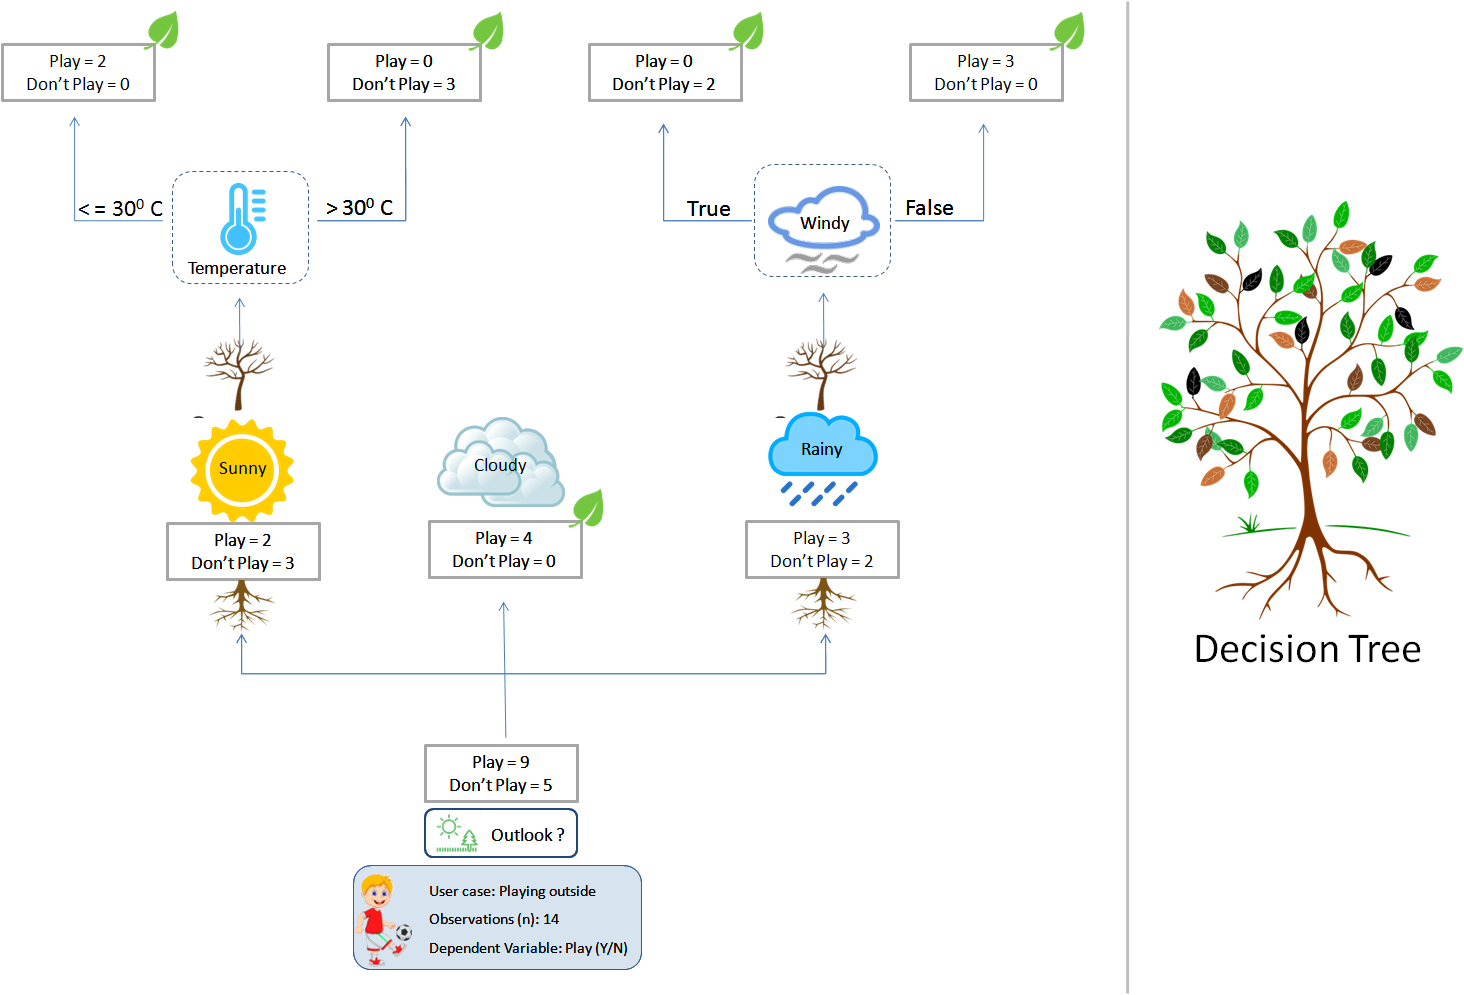

In [1]:
from IPython.display import Image
Image(filename='../Chapter 3 Figures/Decision_Tree.png', width=800)

### Multivariate and Multi-class Decision Tree

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [2]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics

iris = datasets.load_iris()

# X = iris.data[:, [2, 3]]
X = iris.data
y = iris.target

print('Class labels:', np.unique(y))

('Class labels:', array([0, 1, 2]))


Normalize data: the unit of measurement might differ so lets normalize the data before building the model

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

Split data into train and test. When ever we are using radom function its advised to use a seed to ensure the reproducibility of the results.

In [4]:
# split data into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [6]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=0)
clf.fit(X_train, y_train)

# generate evaluation metrics
print "Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train))
print "Train - Confusion matrix :",metrics.confusion_matrix(y_train, clf.predict(X_train))
print "Train - classification report :", metrics.classification_report(y_train, clf.predict(X_train))

print "Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test))
print "Test - Confusion matrix :",metrics.confusion_matrix(y_test, clf.predict(X_test))
print "Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test))

Train - Accuracy : 1.0
Train - Confusion matrix : [[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]
Train - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       1.00      1.00      1.00        32
          2       1.00      1.00      1.00        39

avg / total       1.00      1.00      1.00       105

Test - Accuracy : 0.977777777778
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



### Visualize Decision Tree

In [7]:
tree.export_graphviz(clf, out_file='tree.dot')    

from sklearn.externals.six import StringIO  
import pydot 
out_data = StringIO() 
tree.export_graphviz(clf, out_file=out_data,
                    feature_names=iris.feature_names,
                    class_names=clf.classes_.astype(int).astype(str),
                    filled=True, rounded=True,
                    special_characters=True,
                    node_ids=1,) 
graph = pydot.graph_from_dot_data(out_data.getvalue()) 
graph[0].write_pdf("iris.pdf")  # save to pdf

from IPython.display import IFrame
IFrame("iris.pdf", width=600, height=300)